# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings 

warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

## Task A:

In [4]:
# Task A
# Step 1. Importing the 5_a.csv file:
df1 = pd.read_csv('/content/drive/MyDrive/Applied AI Assignments/Module_3/Assignemnt/Assignment_5_Performance_Metrics_Without_Sklearn/5_Performance_metrics/5_a.csv')

df1.head(10)

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199
5,1.0,0.601600
6,1.0,0.666323
7,1.0,0.567012
8,1.0,0.650230
9,1.0,0.829346


In [5]:
print(df1.y.unique())
print("Number of classes:", df1.y.unique().shape[0])

[1. 0.]
Number of classes: 2


## Checking for data imbalance:

1.0    10000
0.0      100
Name: y, dtype: int64


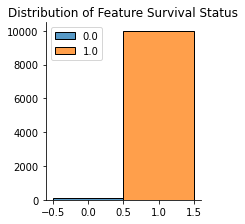

In [6]:
print(df1['y'].value_counts())
# balanced-dataset vs imbalanced datasets

import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(df1,hue='y')
g.map_dataframe(sns.histplot,x='y')
plt.title("Distribution of Feature Survival Status")
plt.legend()

In [7]:

def predict(df,y,thresh_hold):
    y_pred=[]
    for label in df[y]:
        if label<thresh_hold:
            y_pred.append(0)
        else:
            y_pred.append(1)
    return y_pred

## Referance : 
https://kawahara.ca/how-to-compute-truefalse-positives-and-truefalse-negatives-in-python-for-binary-classification-problems/ 

### TP, FP, FN and TN Calculation:

In [8]:
def cm_elem(df,y,y_pred):
   
    TP = np.sum(np.logical_and(df.y_pred == 1, df.y == 1))
    FP = np.sum(np.logical_and(df.y_pred == 1, df.y == 0))

    FN = np.sum(np.logical_and(df.y_pred== 0, df.y == 1))

    TN = np.sum(np.logical_and(df.y_pred == 0, df.y == 0))
    return {'tp':TP,'fp':FP,'fn':FN,'tn':TN}

In [9]:
thresh_hold=0.5
df1['y_pred']=predict(df1,'proba',thresh_hold)
confusion_matrix=cm_elem(df1,'y','y_pred')
print("confusion matrix is: ",confusion_matrix)

confusion matrix is:  {'tp': 10000, 'fp': 100, 'fn': 0, 'tn': 0}


### Precision,Recall and F1_Score for 5_a.csv:

In [10]:
# Precision_Recall and F1_Score computation:
def Precision_Recall_F1_Score_Mat(df):
  confusion_matrix=cm_elem(df,'y','y_pred')
  Pos=df.y.value_counts()
  P=Pos[1]

  precision=confusion_matrix['tp']/(confusion_matrix['tp']+confusion_matrix['fp'])
  recall=confusion_matrix['tp']/P

  F1_score=2*precision*recall/(precision+recall)

  return(precision, recall,F1_score)

In [11]:

precision_1,recall_1,F1_score_1 = Precision_Recall_F1_Score_Mat(df1)
print("precision for 5_a.csv data")
print(precision_1)
print('recall for 5_a.csv data')
print(recall_1)
print('F1 score for 5_a.csv data')
print(F1_score_1)

precision for 5_a.csv data
0.9900990099009901
recall for 5_a.csv data
1.0
F1 score for 5_a.csv data
0.9950248756218906


## Accuracy for 5_a.csv data:

In [12]:

# Accuracy
Acc=(cm_elem(df1,'y','y_pred')['tp']+cm_elem(df1,'y','y_pred')['tn'])/df1.shape[0]
print('the accuracy is: ',Acc)

the accuracy is:  0.9900990099009901


## Referance : Inputs from AppliedAI Team:

In [13]:
# def AUCScore(actual_values, probability_values):
   
    # Getting the indices of probability values in descending order. ==> use np.argsort function
    # Arrange actual_values and probability_values as same as indices order.
    # Ex: actual_values = actual_values[indices], probability_values = probability_values[indices]
   
    # create two empty lists for tpr=[] and fpr=[]
    # for threshold in probability_values:
            # create empty list of y_predicted = []
            # for prob in probability_values:
                  # append 0 to y_predicted if prob < threshold otherwise append 1
            # Now get tn, fp, fn, tp by using actaul_values and y_predicted
            # append tpr value to tpr list ===> tpr = tp/(tp+fn)
            # append fpr value to fpr list ===> fpr = fp/(fp+tn)
   
    # return np.trapz(tpr, fpr)

## AUC Score calculation:

In [14]:
from tqdm import tqdm_notebook 
def AUCscore(df):
  df = df.sort_values(by=['proba'],ascending=False) # sorting the df['proba'] column in descending order
  c = df['y'].value_counts()
  P = c[1] # no of positive points
  N = c[0] # no of negative points
  tpr = []
  fpr = []
  # optimized code for df['y_pred']
  for threshold in tqdm_notebook(df['proba'].unique()):
    df['y_pred'] = np.where(df['proba']>=threshold,1,0) # each time checks for every value in proba column >=threshold value
    confusion_mat=cm_elem(df,'y','y_pred') 
    tpr.append(confusion_mat['tp']/P)
    fpr.append(confusion_mat['fp']/N)
  return (np.trapz(tpr,fpr),tpr,fpr)
# df['y_pred'] = np.where(df['proba']>=threshold,1,0) 
# each time checks for every value in proba column >=threshold value 
# and threshold value is same till checking for all the values in df['proba] is checked.
# and threshold takes next value from the column df['proba'] and again the above steps are repeated.

In [15]:
AUC_score1,TPR1,FPR1 = AUCscore(df1)


## Plotting ROC curve for 5_a.csv data:

In [16]:
import matplotlib.patches as mpatches
def ROC_curve(TPR,FPR,AUC_score):
  plt.title("ROC curve for 5_a.csv data")
  print("AUC score is ", AUC_score)
  plt.plot(FPR,TPR)
  plt.xlabel('fpr')
  plt.ylabel('tpr')
  red_patch = mpatches.Patch(color='red', label=AUC_score)
  plt.legend(handles=[red_patch],loc="upper right")
  plt.show()


AUC score is  0.48829900000000004


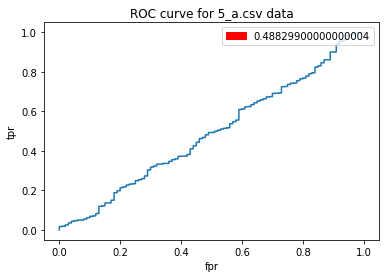

In [17]:
ROC_curve(TPR1,FPR1,AUC_score1)

Please go through the procedure below to calculate the AUC score:

First, we need to sort a dataframe in descending order based on the "proba" column, by using the sort_values() function:

import pandas as pd                                       
data = pd.read_csv("5_a.csv")

data = data.sort_values( by= ["proba"], ascending = False)

While computing AUC score you need to calculate "TP,"FP" at every threshold by using actual "y" and predicted "y_pred".
                                                       tpr = [ ]
                                                       fpr = [ ]
# here "data" is particular task data
import numpy as np
for threshold in tqdm(data['proba'].unique()):
    data['y_pred'] =np.where( data['proba'] > =  threshold, 1,0)

By using TP and FP we can calculate TPR = (TP/P) and FPR=(FP/N), where  "P" (TP+FN)  is number of positive points at given threshold and "N" (TN+FP) is the number of negative points in the given threshold. 

                 Please make sure that you write optimized code while calculating TP, FP, FN, TN

                 TP = (data['y']==1.0) & (data['pred'] == 1.0)).sum()  
                  Please refer link (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html) 

After computing "TPR" and "FPR" at each threshold, append those values inside the "tpr" and "fpr" lists 

To get AUC score, we need to send "tpr" and "fpr" lists as arguments inside the "trapz()" function present in the NumPy module.

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

## Task B:

In [18]:
# Task B
# Step 1. Importing the 5_a.csv file:
df2 = pd.read_csv('/content/drive/MyDrive/Applied AI Assignments/Module_3/Assignemnt/Assignment_5_Performance_Metrics_Without_Sklearn/5_Performance_metrics/5_b.csv')

df2.head(10)

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648
5,0.0,0.190260
6,0.0,0.320328
7,0.0,0.435013
8,0.0,0.284849
9,0.0,0.427919


In [19]:
print(df2.y.unique())
print("Number of classes:", df2.y.unique().shape[0])

[0. 1.]
Number of classes: 2


0.0    10000
1.0      100
Name: y, dtype: int64


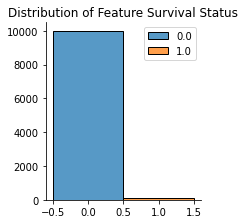

In [20]:
print(df2['y'].value_counts())
# balanced-dataset vs imbalanced datasets

import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(df2,hue='y')
g.map_dataframe(sns.histplot,x='y')
plt.title("Distribution of Feature Survival Status")
plt.legend()

### TP, FP, FN and TN for 5_b.csv data:

In [21]:
thresh_hold=0.5
df2['y_pred']=predict(df2,'proba',thresh_hold)
confusion_matrix=cm_elem(df2,'y','y_pred')
print("confusion matrix is: ",confusion_matrix)

confusion matrix is:  {'tp': 55, 'fp': 239, 'fn': 45, 'tn': 9761}


### Precision, Recall and F1score for 5_b.csv data:


In [22]:
precion_2,recall_2,F1_score2 = Precision_Recall_F1_Score_Mat(df2)
print("recall 2")
print(recall_2)
print("Precision 2")
print(precion_2)
print("F1 score 2")
print(F1_score2)

recall 2
0.55
Precision 2
0.1870748299319728
F1 score 2
0.2791878172588833


## Accuracy for 5_b.csv data:

In [23]:
# Accuracy
Acc2=(cm_elem(df2,'y','y_pred')['tp']+cm_elem(df2,'y','y_pred')['tn'])/df2.shape[0]
print('the accuracy is: ',Acc2)

the accuracy is:  0.9718811881188119


In [24]:
# AUC Score:
AUC_score2,TPR2,FPR2 = AUCscore(df2)

## ROC Curve for 5_b.csv data:

AUC score is  0.9377570000000001


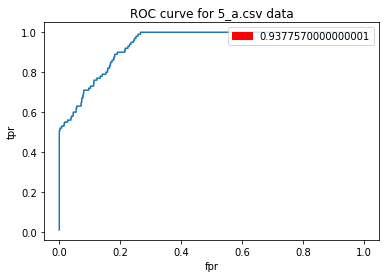

In [25]:
ROC_curve(TPR2,FPR2,AUC_score2)

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

## 1. Loading the 5_c.csv data:

In [26]:
import pandas as pd
df3 = pd.read_csv('/content/drive/MyDrive/Applied AI Assignments/Module_3/Assignemnt/Assignment_5_Performance_Metrics_Without_Sklearn/5_Performance_metrics/5_c.csv')
df3=df3.sort_values(by='prob',ascending=False)
df3.head(5)

,y,prob
2634,1,0.957747
2548,1,0.951437
2447,1,0.948638
2788,1,0.944094
2456,1,0.941113


## 2. Function to compute the best threshold corrosponding to minimum value of A:

In [27]:
def best_threshold1(df):
  values_of_A = [] # list of values of A
  threshold_values = [] # list of thresholds
  for threshold in tqdm_notebook(df['prob'].unique()):
      df['y_pred'] = np.where(df['prob']>=threshold,1,0) # each time checks for every value in proba column >=threshold value
      confusion_mat=cm_elem(df,'y','y_pred') 
      A = (500*confusion_mat['fn'] + 100*confusion_mat['fp'])
      values_of_A.append(A)
      threshold_value = threshold 
      threshold_values.append(threshold_value)
  # threshold_values as key
  dictionary  = dict(zip(threshold_values, values_of_A)) # dictionary of threshold_values and values_A
  minimum_value_of_metric = min(dictionary.values()) # finding the minimum value of A

  for key,value in (dictionary.items()):
    if (value==minimum_value_of_metric):
        return(key,value)

In [28]:
best_value_of_threshold, minimum_value_of_A = best_threshold1(df3)
print("The minimum value of A is :",minimum_value_of_A)
print("The best threshold corrosponding to minimum value of A is :", best_value_of_threshold)




The minimum value of A is : 141000
The best threshold corrosponding to minimum value of A is : 0.2300390278970873


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

## 1.Reading the 5_d.csv data:

In [29]:
import pandas as pd
import numpy as np
df4 = df3 = pd.read_csv('/content/drive/MyDrive/Applied AI Assignments/Module_3/Assignemnt/Assignment_5_Performance_Metrics_Without_Sklearn/5_Performance_metrics/5_d.csv')
df4.head(5)

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


## 2.Mean square error calculation (MSE):



In [30]:
# mse definition:
def mse(df):
  mse = np.mean((df4.y - df4.pred)**2)
  return(mse)

In [31]:
print("Mean Square Error is : ",mse(df4))

Mean Square Error is :  177.16569974554707


## 3. Mean Absolute Percentage Error (MAPE):

In [32]:
def MAPE(df): # Mean Absolute Percentage Error
  e = np.sum(abs(df.y - df.pred))
  y = np.sum(df.y)
  MAPE = e/y
  return(MAPE)

In [33]:
print("Mean Absolute Percentage Error :", MAPE(df4))

Mean Absolute Percentage Error : 0.1291202994009687


## 4. R^2 error :

In [34]:
def R_square_error(df):
  SS_res = np.sum((df.y - df.pred)**2)
  y_bar = np.mean(df.y)
  SS_tot = np.sum((df.y - y_bar)**2)

  R_Square = 1 - (SS_res/SS_tot)
  return(R_Square)


In [35]:
print("R_Square Error is : ", R_square_error(df4))

R_Square Error is :  0.9563582786990937
